In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
from acquire import get_titanic_data
from prepare import clean_titanic
from env import host,db,protocol,password,user,mysqlcon
from wrangle import get_zillow_data, wrangle_zillow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import sklearn.preprocessing
from sklearn.impute import SimpleImputer

import sklearn.metrics
import acquire
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

np.random.seed(123)

In [2]:
#acquire
df=get_zillow_data()

In [3]:
round(df.isnull().sum() / len(df) * 100,2)

Unnamed: 0                      0.00
bedroomcnt                      0.10
bathroomcnt                     0.10
calculatedfinishedsquarefeet    1.51
taxvaluedollarcnt               1.15
yearbuilt                       1.60
taxamount                       0.76
fips                            0.10
propertylandusetypeid           0.10
propertylandusedesc             0.10
dtype: float64

In [4]:
#clean the data 
df = wrangle_zillow(df)

In [5]:
df = df.fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 1 to 2982282
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
 8   propertylandusetypeid         float64
dtypes: float64(8), int64(1)
memory usage: 164.3 MB


In [7]:
df.describe()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
count,2.152863e+06,2.152863e+06,2.152863e+06,2.152863e+06,2.152863e+06,2.152863e+06,2.152863e+06,2.152863e+06,2152863.0
mean,1.490834e+06,3.287179e+00,2.230676e+00,1.855514e+03,4.617905e+05,1.952445e+03,5.623240e+03,6.048377e+03,261.0
std,8.608785e+05,9.547809e-01,9.992898e-01,1.225286e+03,6.996308e+05,1.307438e+02,8.174468e+03,2.043329e+01,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.037000e+03,261.0
25%,7.451170e+05,3.000000e+00,2.000000e+00,1.253000e+03,1.880370e+05,1.949000e+03,2.524540e+03,6.037000e+03,261.0
50%,1.490613e+06,3.000000e+00,2.000000e+00,1.620000e+03,3.275770e+05,1.958000e+03,4.101630e+03,6.037000e+03,261.0
75%,2.235860e+06,4.000000e+00,3.000000e+00,2.204000e+03,5.344550e+05,1.975000e+03,6.406900e+03,6.059000e+03,261.0
max,2.982282e+06,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03,261.0


In [8]:
#test train split
x_train_and_validate, x_test = train_test_split(df, random_state=123)

x_train, x_validate = train_test_split(x_train_and_validate)

In [9]:
#### Min Max Scaler
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)


### Apply to train, validate, and test
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

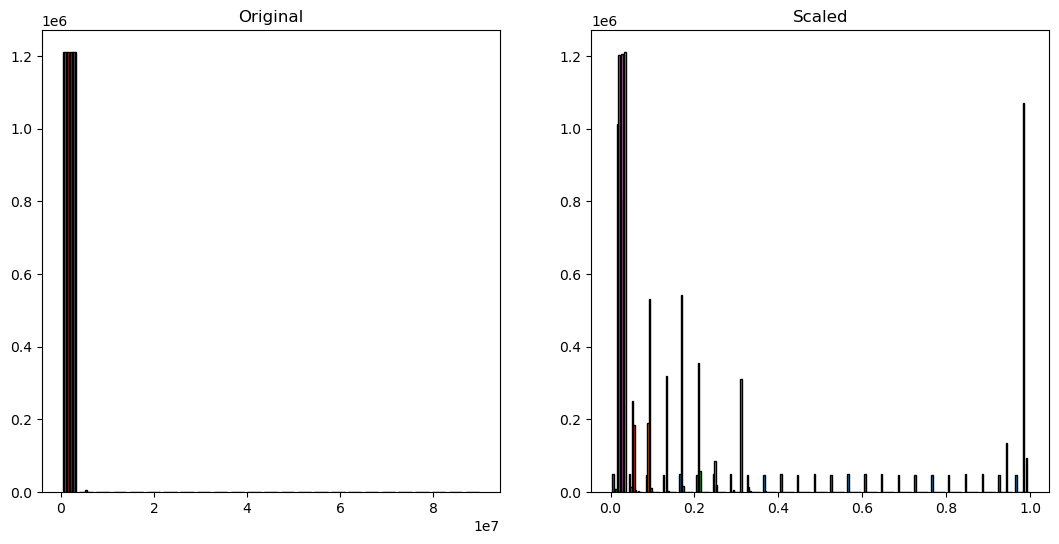

In [10]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

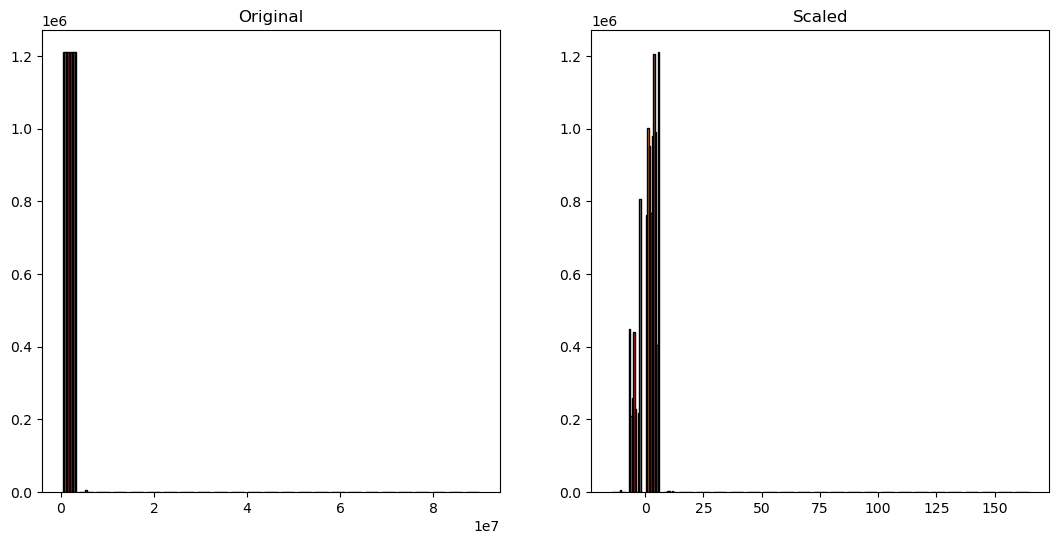

In [11]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [12]:
x_train_scaled.shape, x_train.shape

((1210985, 9), (1210985, 9))

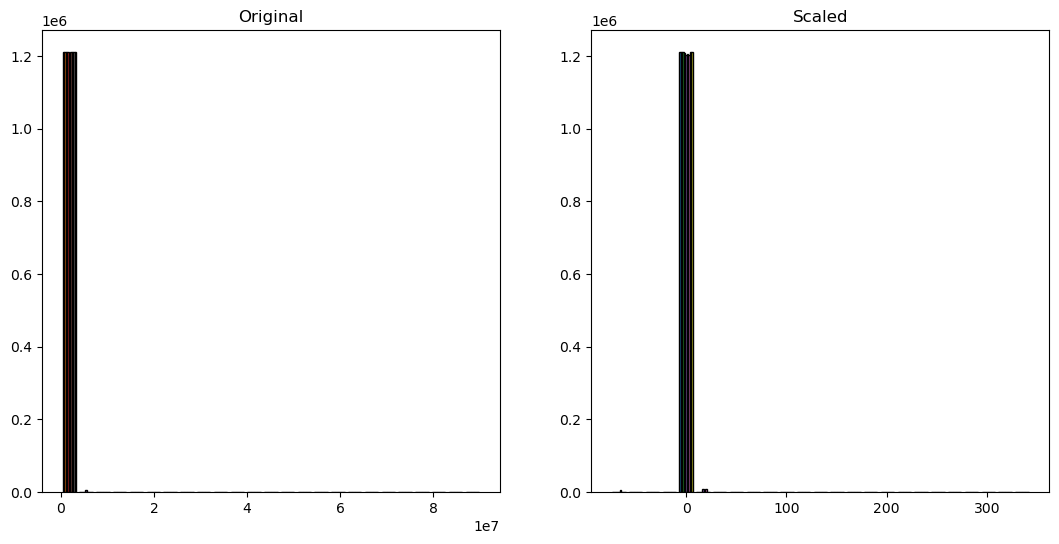

In [13]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

## Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

-- The data is returned in an array that matches the original x_train data

## Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [14]:
scaler.inverse_transform(x_train_scaled)

array([[1.959970e+05, 4.000000e+00, 2.000000e+00, ..., 1.178430e+03,
        6.037000e+03, 2.610000e+02],
       [2.008655e+06, 4.000000e+00, 2.000000e+00, ..., 7.302960e+03,
        6.037000e+03, 2.610000e+02],
       [1.958640e+05, 3.000000e+00, 2.000000e+00, ..., 1.342670e+03,
        6.037000e+03, 2.610000e+02],
       ...,
       [7.488780e+05, 4.000000e+00, 2.000000e+00, ..., 2.549130e+03,
        6.037000e+03, 2.610000e+02],
       [2.457747e+06, 4.000000e+00, 2.500000e+00, ..., 6.539360e+03,
        6.059000e+03, 2.610000e+02],
       [1.608354e+06, 3.000000e+00, 2.500000e+00, ..., 2.961600e+03,
        6.059000e+03, 2.610000e+02]])

In [15]:
x_train

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
195997,195997,4.0,2.0,1668.0,102092.0,1958.0,1178.43,6037.0,261.0
2008655,2008655,4.0,2.0,1720.0,627424.0,1961.0,7302.96,6037.0,261.0
195864,195864,3.0,2.0,1288.0,108323.0,1953.0,1342.67,6037.0,261.0
1524546,1524546,4.0,3.0,2238.0,231160.0,1986.0,3657.71,6037.0,261.0
1760497,1760497,4.0,2.5,2065.0,195043.0,1978.0,2177.68,6111.0,261.0
...,...,...,...,...,...,...,...,...,...
1686048,1686048,3.0,2.0,1449.0,142874.0,1976.0,1592.42,6111.0,261.0
1487056,1487056,2.0,1.0,950.0,143495.0,1972.0,1918.76,6059.0,261.0
748878,748878,4.0,2.0,1476.0,138898.0,1955.0,2549.13,6037.0,261.0
2457747,2457747,4.0,2.5,3105.0,632837.0,1986.0,6539.36,6059.0,261.0


### Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

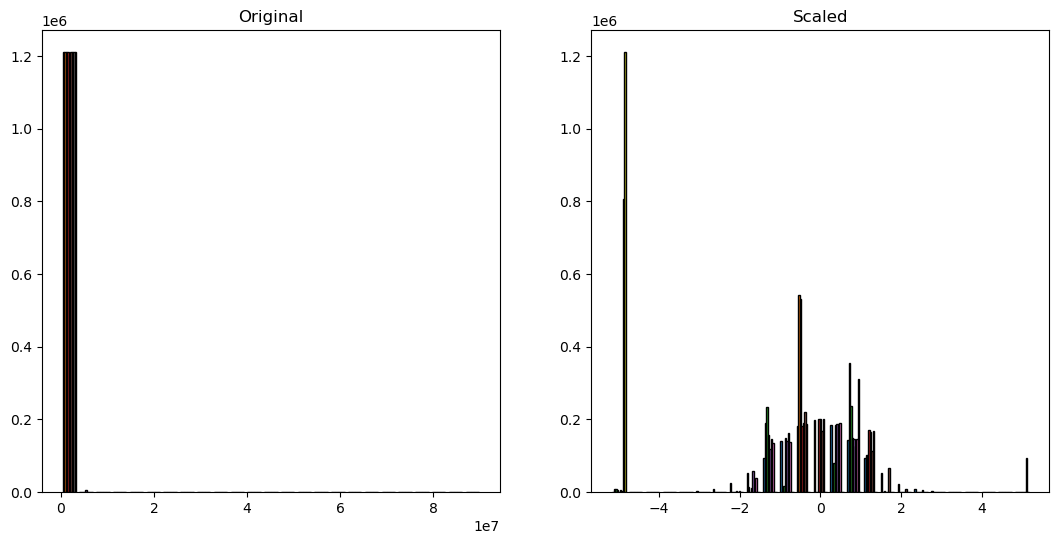

In [16]:
from sklearn import preprocessing
scaler = preprocessing.QuantileTransformer(n_quantiles=10,random_state=123,output_distribution='normal')
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

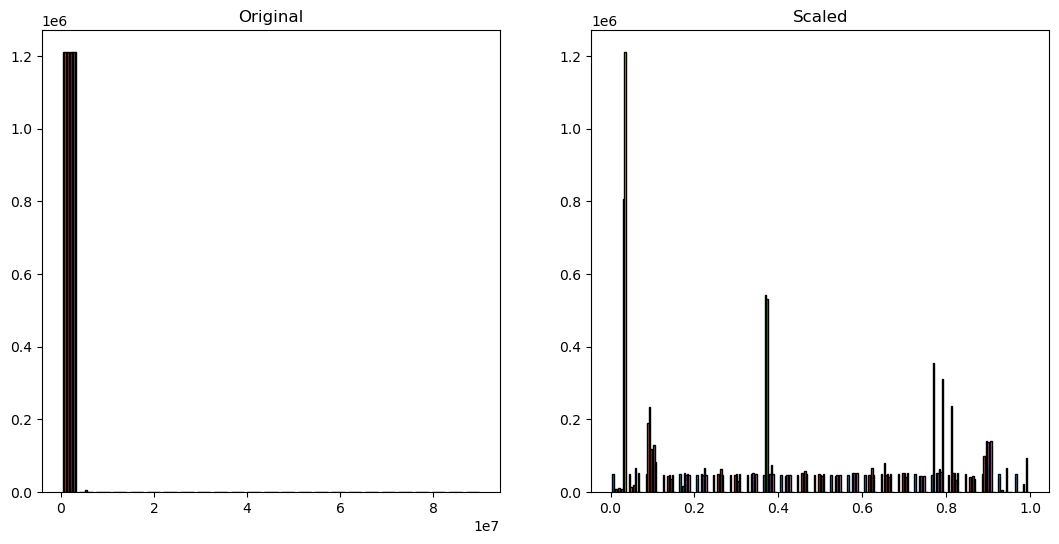

In [17]:
from sklearn import preprocessing
scaler = preprocessing.QuantileTransformer(n_quantiles=10,random_state=123)
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def minmax_scaler(x_train, x_validate, x_test,):
    ######## Min Max Scaler (range calculations)
    scaler = sklearn.preprocessing.MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(x_train)
    ### Apply to train, validate, and test
    x_train_scaled = scaler.transform(x_train)
    x_validate_scaled = scaler.transform(x_validate)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_validate_scaled, x_test_scaled